<a href="https://colab.research.google.com/github/JosephBenhar/Customerbehaviour7/blob/main/CustomerBehaviour7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install scikit-mdr scikit-multilearn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.4/89.4 kB 3.1 MB/s eta 0:00:00


In [2]:
!pip install scikit-mdr

libraries

In [3]:
# importing necessary Python libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import plotly.express as px
#import plotly.offline as pyoff
import plotly.graph_objs as go
#import plotly.figure_factory as ff

# avoid displaying warnings
import warnings
warnings.filterwarnings("ignore")

#import machine learning related libraries
from sklearn.svm import SVC
from sklearn.multioutput import MultiOutputClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold, cross_val_score, train_test_split, GridSearchCV, cross_validate
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, confusion_matrix
from sklearn.cluster import KMeans
import xgboost as xgb
import time
from yellowbrick.cluster import KElbowVisualizer
from sklearn.mixture import GaussianMixture
from sklearn.cluster import KMeans


In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import ticker
import seaborn as sns
import datetime as dt
%matplotlib inline

dataset

In [6]:
data = pd.read_csv("/content/drive/MyDrive/Consumer behaviour.zip",encoding='ISO-8859-1')
df = data.copy()
df.head()
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680.0,France


In [7]:
import pandas as pd

# Assuming your DataFrame is named 'df'
# Convert 'InvoiceDate' to DateTime format
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

# Find the start and end dates
start_date = df['InvoiceDate'].min()
end_date = df['InvoiceDate'].max()

print("Start Date:", start_date)
print("End Date:", end_date)


Start Date: 2010-12-01 08:26:00
End Date: 2011-12-09 12:50:00


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [9]:
# Check null values
df.isna().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [10]:
# drop null values
df.dropna(inplace=True)
df.isna().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

In [11]:
# check duplicates
df[df.duplicated()].shape

(5225, 8)

In [12]:
# Drop duplicated data
df = df.drop_duplicates(keep='first')
df.shape

(401604, 8)

In [13]:
df.tail()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France
541908,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09 12:50:00,4.95,12680.0,France


In [14]:
data = data[~data.InvoiceNo.str.contains('C',na=False)]
print("Dataset is free from cancelled products information")


Dataset is free from cancelled products information


In [15]:
# Drop data contains "C" in Invoice
df = df[~df['InvoiceNo'].str.contains('C')]
df.shape

(392732, 8)

In [16]:
# Convert 'Quantity' column to float and assign it back to the DataFrame
df['Quantity'] = df['Quantity'].astype('float')

# Change 'InvoiceDate' dtype to datetime
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

# Checking the datatypes after conversion
df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 392732 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    392732 non-null  object        
 1   StockCode    392732 non-null  object        
 2   Description  392732 non-null  object        
 3   Quantity     392732 non-null  float64       
 4   InvoiceDate  392732 non-null  datetime64[ns]
 5   UnitPrice    392732 non-null  float64       
 6   CustomerID   392732 non-null  float64       
 7   Country      392732 non-null  object        
dtypes: datetime64[ns](1), float64(3), object(4)
memory usage: 27.0+ MB


In [17]:
# Create the 'Revenue' column based on the product of 'Quantity' and 'UnitPrice'
df['Revenue'] = df['Quantity'] * df['UnitPrice']

# Display the DataFrame with the newly added 'Revenue' column
print(df.head())


  InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER       6.0   
1    536365     71053                  WHITE METAL LANTERN       6.0   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER       8.0   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE       6.0   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.       6.0   

          InvoiceDate  UnitPrice  CustomerID         Country  Revenue  
0 2010-12-01 08:26:00       2.55     17850.0  United Kingdom    15.30  
1 2010-12-01 08:26:00       3.39     17850.0  United Kingdom    20.34  
2 2010-12-01 08:26:00       2.75     17850.0  United Kingdom    22.00  
3 2010-12-01 08:26:00       3.39     17850.0  United Kingdom    20.34  
4 2010-12-01 08:26:00       3.39     17850.0  United Kingdom    20.34  


In [18]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Revenue
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6.0,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6.0,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8.0,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6.0,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6.0,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34


In [19]:
# Create the 'Revenue' column based on the product of 'Quantity' and 'UnitPrice'
df['Revenue'] = df['Quantity'] * df['UnitPrice']

# Display the DataFrame with the newly added 'Revenue' column
print(df.head())

  InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER       6.0   
1    536365     71053                  WHITE METAL LANTERN       6.0   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER       8.0   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE       6.0   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.       6.0   

          InvoiceDate  UnitPrice  CustomerID         Country  Revenue  
0 2010-12-01 08:26:00       2.55     17850.0  United Kingdom    15.30  
1 2010-12-01 08:26:00       3.39     17850.0  United Kingdom    20.34  
2 2010-12-01 08:26:00       2.75     17850.0  United Kingdom    22.00  
3 2010-12-01 08:26:00       3.39     17850.0  United Kingdom    20.34  
4 2010-12-01 08:26:00       3.39     17850.0  United Kingdom    20.34  


In [20]:
# Checcking the statsitic of numeric features
df[['Quantity', 'UnitPrice', 'Revenue']].describe().T

,count,mean,std,min,25%,50%,75%,max
Quantity,392732.0,13.153718,181.588420,1.0,2.00,6.00,12.00,80995.00
UnitPrice,392732.0,3.125596,22.240725,0.0,1.25,1.95,3.75,8142.75
Revenue,392732.0,22.629195,311.083465,0.0,4.95,12.39,19.80,168469.60


In [21]:
# checking the price column which has a value of 0
df[df['UnitPrice']==0]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Revenue
9302,537197,22841,ROUND CAKE TIN VINTAGE GREEN,1.0,2010-12-05 14:02:00,0.0,12647.0,Germany,0.0
33576,539263,22580,ADVENT CALENDAR GINGHAM SACK,4.0,2010-12-16 14:36:00,0.0,16560.0,United Kingdom,0.0
40089,539722,22423,REGENCY CAKESTAND 3 TIER,10.0,2010-12-21 13:45:00,0.0,14911.0,EIRE,0.0
47068,540372,22090,PAPER BUNTING RETROSPOT,24.0,2011-01-06 16:41:00,0.0,13081.0,United Kingdom,0.0
47070,540372,22553,PLASTERS IN TIN SKULLS,24.0,2011-01-06 16:41:00,0.0,13081.0,United Kingdom,0.0
56674,541109,22168,ORGANISER WOOD ANTIQUE WHITE,1.0,2011-01-13 15:10:00,0.0,15107.0,United Kingdom,0.0
86789,543599,84535B,FAIRY CAKES NOTEBOOK A6 SIZE,16.0,2011-02-10 13:08:00,0.0,17560.0,United Kingdom,0.0
130188,547417,22062,CERAMIC BOWL WITH LOVE HEART DESIGN,36.0,2011-03-23 10:25:00,0.0,13239.0,United Kingdom,0.0
139453,548318,22055,MINI CAKE STAND HANGING STRAWBERY,5.0,2011-03-30 12:45:00,0.0,13113.0,United Kingdom,0.0
145208,548871,22162,HEART GARLAND RUSTIC PADDED,2.0,2011-04-04 14:42:00,0.0,14410.0,United Kingdom,0.0


In [22]:
# Remove rows that Price have 0 value from the dataset
df = df[df['UnitPrice']>0]
df.shape

(392692, 9)

In [23]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Revenue
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6.0,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6.0,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8.0,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6.0,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6.0,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34


In [24]:
# checking total order in dataset
df['InvoiceNo'].nunique()

18532

In [25]:
# checking number of customers
df['CustomerID'].nunique()

4338

In [26]:
# Checking the number of Quantity sold
df['Quantity'].sum()

5152002.0

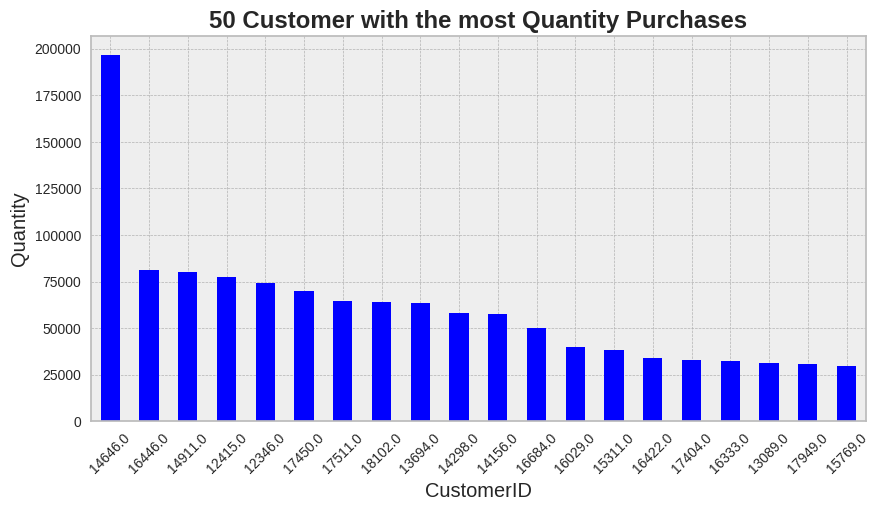

In [27]:
# 100 Customer with the most Quantity Purchases
plt.style.use('bmh')
df.groupby('CustomerID')['Quantity'].sum().sort_values(ascending=False).head(20).plot(kind='bar', color='blue', figsize=(10,5))
plt.xlabel('CustomerID')
plt.ylabel('Quantity')
plt.title('50 Customer with the most Quantity Purchases', fontweight='bold')
plt.xticks(rotation=45)
plt.show()


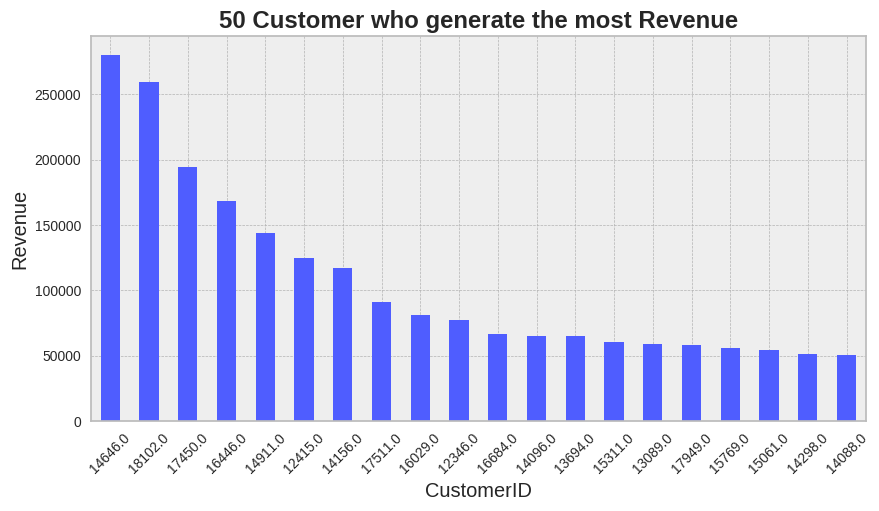

In [28]:
# 100 Customer who generate the most Revenue
df.groupby('CustomerID')['Revenue'].sum().sort_values(ascending=False).head(20).plot(kind='bar', color='#4f5dff', figsize=(10,5))
plt.xlabel('CustomerID')
plt.ylabel('Revenue')
plt.title('50 Customer who generate the most Revenue', fontweight='bold')
plt.xticks(rotation=45)
plt.show()

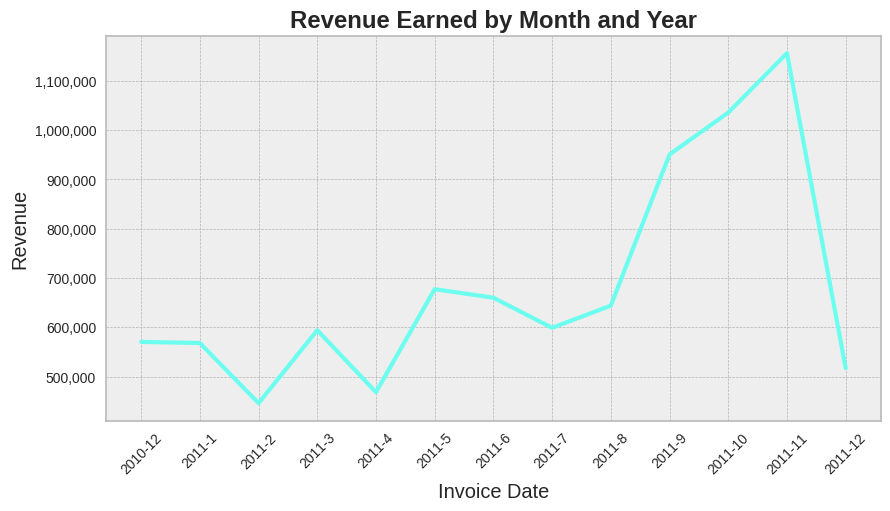

In [29]:
# Revenue per month and year
monthly_revenue = df.groupby([df['InvoiceDate'].dt.year, df['InvoiceDate'].dt.month])['Revenue'].sum()

# Create a line plot of monthly revenue
ax = monthly_revenue.plot(kind='line', figsize=(10,5), color='#6cfff0', linewidth=3)

# Set xticks and xticklabels to show all values
ax.set_xticks(range(len(monthly_revenue.index)))
ax.set_xticklabels(['{}-{}'.format(year, month) for year, month in monthly_revenue.index], rotation=45)

# Set ylabel format
fmt = '{x:,.0f}'
tick = ticker.StrMethodFormatter(fmt)
ax.yaxis.set_major_formatter(tick)

# set title and label
plt.xlabel('Invoice Date')
plt.ylabel('Revenue')
plt.title('Revenue Earned by Month and Year', fontweight='bold')
# Show the plot
plt.show()

In [30]:
# Checking The Correlation
df[['Quantity','UnitPrice','Revenue']].corr()

,Quantity,UnitPrice,Revenue
Quantity,1.000000,-0.004578,0.914451
UnitPrice,-0.004578,1.000000,0.081619
Revenue,0.914451,0.081619,1.000000


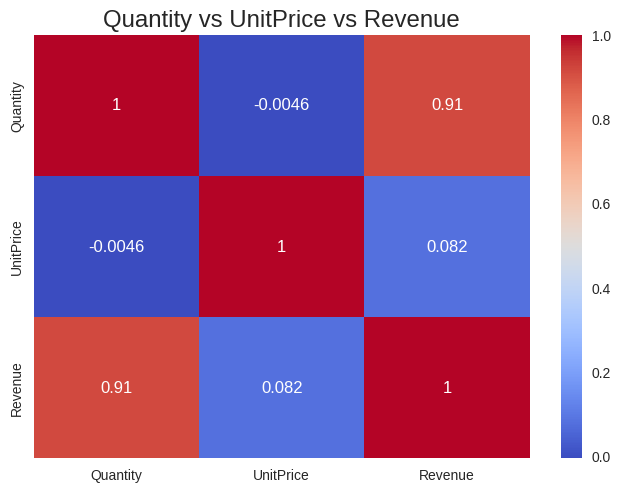

In [31]:
sns.heatmap(df[['Quantity', 'UnitPrice', 'Revenue']].corr(), annot=True, cmap='coolwarm')
plt.title('Quantity vs UnitPrice vs Revenue')
plt.show()

In [32]:
## RFM Metrics ##

In [33]:
df1 = df.drop(['StockCode','Description','Country'], axis=1)
df1.head()

,InvoiceNo,Quantity,InvoiceDate,UnitPrice,CustomerID,Revenue
0,536365,6.0,2010-12-01 08:26:00,2.55,17850.0,15.30
1,536365,6.0,2010-12-01 08:26:00,3.39,17850.0,20.34
2,536365,8.0,2010-12-01 08:26:00,2.75,17850.0,22.00
3,536365,6.0,2010-12-01 08:26:00,3.39,17850.0,20.34
4,536365,6.0,2010-12-01 08:26:00,3.39,17850.0,20.34


In [34]:
df1['InvoiceDate'].max()

Timestamp('2011-12-09 12:50:00')

In [35]:
max_date = df1['InvoiceDate'].max()
cutoff_timedelta = dt.timedelta(days=90)
cutoff_date = max_date - cutoff_timedelta

In [36]:
cutoff_date

Timestamp('2011-09-10 12:50:00')

In [37]:
before_cutoff = df1[df1['InvoiceDate'] <= cutoff_date]
after_cutoff = df1[df1['InvoiceDate'] > cutoff_date]

In [38]:
targets = after_cutoff.groupby('CustomerID').sum().rename({'Revenue' : 'total_spend_90'}, axis=1).assign(spend_90 = 1)
targets.drop(['Quantity','UnitPrice'], axis=1, inplace=True)
targets.head()

,total_spend_90,spend_90
CustomerID,,
12347.0,1519.14,1
12348.0,310.00,1
12349.0,1757.55,1
12352.0,944.23,1
12356.0,58.35,1


In [39]:
targets.shape

(2889, 2)

In [40]:
# create analysis date
analysis_date = df['InvoiceDate'].max() + dt.timedelta(days=1)

In [41]:
features = before_cutoff.groupby('CustomerID').agg({
    'InvoiceDate': lambda InvoiceDate: (analysis_date - InvoiceDate.max()).days,  # Recency
    'InvoiceNo': lambda InvoiceNo: InvoiceNo.nunique(),  # Frequency (changed to 'InvoiceNo')
    'Revenue': lambda Revenue: Revenue.sum()  # Monetary
})


In [42]:
features.columns = ['recency', 'frequency', 'monetary']

In [43]:
features

,recency,frequency,monetary
CustomerID,,,
12346.0,326,1,77183.60
12347.0,130,5,2790.86
12348.0,249,3,1487.24
12350.0,310,1,334.40
12352.0,262,5,1561.81
...,...,...,...
18280.0,278,1,180.60
18281.0,181,1,80.82
18282.0,126,1,100.21


In [44]:
# Merge features and targets dataframe
features_df = pd.merge(features, targets, how='left', on='CustomerID').fillna(0)
features_df

,recency,frequency,monetary,total_spend_90,spend_90
CustomerID,,,,,
12346.0,326,1,77183.60,0.00,0.0
12347.0,130,5,2790.86,1519.14,1.0
12348.0,249,3,1487.24,310.00,1.0
12350.0,310,1,334.40,0.00,0.0
12352.0,262,5,1561.81,944.23,1.0
...,...,...,...,...,...
18280.0,278,1,180.60,0.00,0.0
18281.0,181,1,80.82,0.00,0.0
18282.0,126,1,100.21,77.84,1.0


Problem 1
How much will the customer spend in the next 90 days?

In [45]:
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.exceptions import NotFittedError
from sklearn.metrics import r2_score, mean_absolute_error

In [46]:
X = features_df.drop(['total_spend_90','spend_90'], axis=1)
X

,recency,frequency,monetary
CustomerID,,,
12346.0,326,1,77183.60
12347.0,130,5,2790.86
12348.0,249,3,1487.24
12350.0,310,1,334.40
12352.0,262,5,1561.81
...,...,...,...
18280.0,278,1,180.60
18281.0,181,1,80.82
18282.0,126,1,100.21


In [47]:
y_spend = features_df[['total_spend_90']]
y_spend = y_spend.to_numpy().reshape(-1)
y_spend

array([   0.  , 1519.14,  310.  , ...,   77.84,  958.7 , 1072.  ])

In [48]:
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor

# Define pipelines for different models
pipelines = {
    'rf': make_pipeline(RandomForestRegressor(random_state=42)),
    'gb': make_pipeline(GradientBoostingRegressor(random_state=42)),
    'dt': make_pipeline(DecisionTreeRegressor(random_state=42)),
    'xgb': make_pipeline(XGBRegressor(random_state=42)),
    'svm': make_pipeline(SVR()),
    'knn': make_pipeline(KNeighborsRegressor())
}

# You may adjust the hyperparameters or preprocessing steps inside each pipeline as needed


In [49]:
hypergrid = {
    'rf': {
        'randomforestregressor__min_samples_split': [2, 4, 6],
        'randomforestregressor__min_samples_leaf': [1, 2, 3]
    },
    'gb': {
        'gradientboostingregressor__alpha': [0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 0.99]
    },
    'dt': {
        'decisiontreeregressor__min_samples_split': [2, 4, 6],
        'decisiontreeregressor__min_samples_leaf': [1, 2, 3]
    },
    'xgb': {
        'xgbregressor__alpha': [0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 0.99]
        # Add other XGBoost hyperparameters as needed
    },
    'svm': {
        'svr__C': [0.1, 1, 10],
        'svr__gamma': [0.001, 0.01, 0.1, 1]
    },
    'knn': {
        'kneighborsregressor__n_neighbors': [3, 5, 7],
        'kneighborsregressor__weights': ['uniform', 'distance']
    }
}


In [50]:
fit_models = {}
for algo, pipeline in pipelines.items():
    model = GridSearchCV(pipeline, hypergrid[algo], cv=5, n_jobs=-1)
    try:
        print('Starting training for {}.'.format(algo))
        model.fit(X, y_spend)
        fit_models[algo] = model
        print('{} has been successfully fit.'.format(algo))
    except NotFittedError as e:
        print(repr(e))


Starting training for rf.
rf has been successfully fit.
Starting training for gb.
gb has been successfully fit.
Starting training for dt.
dt has been successfully fit.
Starting training for xgb.
xgb has been successfully fit.
Starting training for svm.
svm has been successfully fit.
Starting training for knn.
knn has been successfully fit.


In [51]:
for algo, model in fit_models.items():
    yhat = model.predict(X)
    print('Predicted {}:'.format(algo), yhat)

Predicted rf: [22700.74379008  1600.10033295   461.06712338 ...    95.45704827
  1016.29419141   951.86472018]
Predicted gb: [ 880.68081444 1093.04021854  627.48518082 ...  126.48232663  608.50454051
  385.04510929]
Predicted dt: [2375.16       2049.27666667  522.5325     ...  113.          732.742
  688.112     ]
Predicted xgb: [ -10.310507 1619.332     403.56396  ...  120.684715  819.04016
  620.7339  ]
Predicted svm: [235.8847882  310.45288654 259.70388654 ... 122.99055523 275.97787039
 304.61613037]
Predicted knn: [38521.7          882.48571429   609.81142857 ...    82.52857143
   819.60285714   678.28714286]


In [52]:
for algo,model in fit_models.items():
    yhat = model.predict(X)
    print('{} scores - R2:{} MAE:{}'.format(algo, r2_score(y_spend, yhat), mean_absolute_error(y_spend, yhat)))

rf scores - R2:0.7968917154756514 MAE:388.4814128355638
gb scores - R2:0.9673363279269482 MAE:437.3379477149177
dt scores - R2:0.6117173878333446 MAE:448.6949951038576
xgb scores - R2:0.953500711319969 MAE:263.311461321718
svm scores - R2:-0.013295290626516909 MAE:793.9639511012513
knn scores - R2:0.4902110369305869 MAE:610.1449418397626


In [53]:
### XGB Performed Well ###

In [54]:
prediction_reg = fit_models['gb'].predict(X)
prediction_reg

array([ 880.68081444, 1093.04021854,  627.48518082, ...,  126.48232663,
        608.50454051,  385.04510929])

In [55]:
pred_reg_df = pd.DataFrame(prediction_reg, columns=['prediction_spend'])
pred_reg_df.head()

,prediction_spend
0,880.680814
1,1093.040219
2,627.485181
3,215.185733
4,749.430936


Whether the customer will make a repeat order in the next 90 days?

In [56]:
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor

In [57]:
y_prob = features_df[['spend_90']]
y_prob = y_prob.to_numpy().reshape(-1)
y_prob

array([0., 1., 1., ..., 1., 1., 1.])

In [58]:
X.head()

,recency,frequency,monetary
CustomerID,,,
12346.0,326,1,77183.60
12347.0,130,5,2790.86
12348.0,249,3,1487.24
12350.0,310,1,334.40
12352.0,262,5,1561.81


In [59]:
# Preparing the pipeline
pipeline_clf = {
'rf': make_pipeline(RandomForestRegressor(random_state=42)),
    'gb': make_pipeline(GradientBoostingRegressor(random_state=42)),
    'dt': make_pipeline(DecisionTreeRegressor(random_state=42)),
    'xgb': make_pipeline(XGBRegressor(random_state=42)),
    'svm': make_pipeline(SVR()),
    'knn': make_pipeline(KNeighborsRegressor())
}

In [60]:
# Preparing grid parameters
hyperparams = {
    'rf': {
        'randomforestregressor__n_estimators': [100, 150, 200],
        'randomforestregressor__max_depth': [5, 10, 15],
        'randomforestregressor__min_samples_leaf': [1, 2, 3],
        'randomforestregressor__min_samples_split': [2, 3, 4]
    },
    'gb': {
        'gradientboostingregressor__n_estimators': [100, 150, 200],
        'gradientboostingregressor__max_depth': [5, 10, 15],
        'gradientboostingregressor__min_samples_leaf': [1, 2, 3],
        'gradientboostingregressor__min_samples_split': [2, 3, 4]
    },
    'dt': {
        'decisiontreeregressor__max_depth': [5, 10, 15],
        'decisiontreeregressor__min_samples_leaf': [1, 2, 3],
        'decisiontreeregressor__min_samples_split': [2, 3, 4]
    },
    'xgb': {
        'xgbregressor__n_estimators': [100, 150, 200],
        'xgbregressor__max_depth': [5, 10, 15],
        'xgbregressor__min_child_weight': [1, 3, 5],
        'xgbregressor__gamma': [0.0, 0.1, 0.2]
    },
    'svm': {
        'svr__C': [0.1, 1, 10],
        'svr__gamma': [0.001, 0.01, 0.1, 1]
    },
    'knn': {
        'kneighborsregressor__n_neighbors': [3, 5, 7],
        'kneighborsregressor__weights': ['uniform', 'distance']
    },
    'rfc': {
        'randomforestclassifier__n_estimators': [100, 150, 200],
        'randomforestclassifier__max_depth': [5, 10, 15],
        'randomforestclassifier__min_samples_leaf': [1, 2, 3],
        'randomforestclassifier__min_samples_split': [2, 3, 4]
    },
    'gbc': {
        'gradientboostingclassifier__n_estimators': [100, 150, 200],
        'gradientboostingclassifier__max_depth': [5, 10, 15],
        'gradientboostingclassifier__min_samples_leaf': [1, 2, 3],
        'gradientboostingclassifier__min_samples_split': [2, 3, 4]
    },
    'xgbc': {
        'xgbclassifier__n_estimators': [100, 150, 200],
        'xgbclassifier__max_depth': [5, 10, 15],
        'xgbclassifier__min_child_weight': [1, 3, 5],
        'xgbclassifier__gamma': [0.0, 0.1, 0.2]
    }
}

In [61]:
fit_clf_models = {}
for algo, pipeline in pipeline_clf.items():
    model = GridSearchCV(pipeline, hyperparams[algo], cv=5, n_jobs=-1)
    try:
        print('Starting training for {}.'.format(algo))
        model.fit(X, y_prob)
        fit_clf_models[algo] = model
        print('{} has been successfully fit.'.format(algo))
    except NotFittedError as e:
        print(repr(e))

Starting training for rf.
rf has been successfully fit.
Starting training for gb.
gb has been successfully fit.
Starting training for dt.
dt has been successfully fit.
Starting training for xgb.
xgb has been successfully fit.
Starting training for svm.
svm has been successfully fit.
Starting training for knn.
knn has been successfully fit.


In [62]:
for algo, model in fit_clf_models.items():
    yhat = model.predict(X)
    print('Predicted {}:'.format(algo), yhat)

Predicted rf: [0.36156201 0.87913638 0.70384823 ... 0.44904777 0.9095891  0.57076665]
Predicted gb: [0.00211708 0.89616816 0.80393374 ... 0.60338779 0.8263796  0.73850581]
Predicted dt: [0.28205128 0.86147186 0.74352332 ... 0.43678161 0.97058824 0.4652568 ]
Predicted xgb: [0.26412252 0.8638074  0.67490184 ... 0.508235   0.915562   0.7088108 ]
Predicted svm: [0.09997856 0.90000932 0.89999604 ... 0.89997121 0.90002946 0.89996408]
Predicted knn: [0.85714286 0.85714286 0.71428571 ... 0.57142857 0.71428571 0.85714286]


In [63]:
from sklearn.metrics import mean_absolute_error

for algo, model in fit_clf_models.items():
    yhat = model.predict(X)
    print('{} scores - accuracy: {}'.format(algo, mean_absolute_error(y_prob, yhat)))



rf scores - accuracy: 0.3850895879250465
gb scores - accuracy: 0.3280268970823255
dt scores - accuracy: 0.385023386792488
xgb scores - accuracy: 0.371598065472056
svm scores - accuracy: 0.10000428226712703
knn scores - accuracy: 0.3536668079694785


In [64]:
prediction_clf = fit_models['svm'].predict(X)
prediction_clf


array([235.8847882 , 310.45288654, 259.70388654, ..., 122.99055523,
       275.97787039, 304.61613037])

In [65]:
# Accessing an element at a specific index (e.g., index 1)
some_element = prediction_clf[1]



In [66]:
pred_clf_df = pd.DataFrame(prediction_clf, columns=['prediction_prob'])
pred_clf_df.head()

,prediction_prob
0,235.884788
1,310.452887
2,259.703887
3,68.151540
4,259.688070


In [67]:
# Access the 'xgb' model
xgb_model = fit_models['xgb'].best_estimator_.named_steps['xgbregressor']



In [68]:
feature_importance = xgb_model.feature_importances_

In [69]:
# Create dataframe for show feature importance
df_feature_importance = pd.DataFrame({'Feature': X.columns,
                                      'Importance': feature_importance})

In [70]:
# Sorting feature importance
df_feature_importance = df_feature_importance.sort_values('Importance', ascending=False)

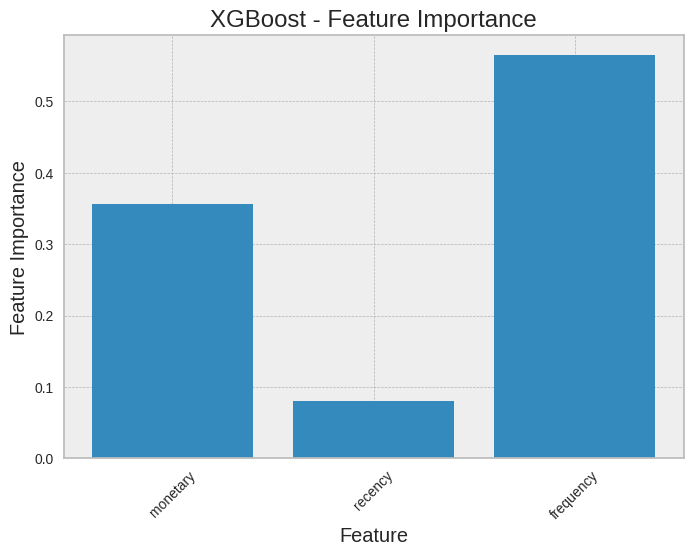

In [71]:
# Assuming you have the 'xgb_model' as your trained XGBoost model

# Show feature importance as barplot for XGBoost model
plt.bar(range(len(xgb_model.feature_importances_)), xgb_model.feature_importances_)
plt.xlabel('Feature')
plt.ylabel('Feature Importance')
plt.title('XGBoost - Feature Importance')
plt.xticks(range(len(xgb_model.feature_importances_)), df_feature_importance['Feature'], rotation=45)
plt.show()


In [72]:
# Access the best SVM model from GridSearchCV
best_svm_model = fit_clf_models['svm'].best_estimator_

# Get keys of the steps in the pipeline
steps_keys = best_svm_model.named_steps.keys()
print(steps_keys)



dict_keys(['svr'])


In [73]:
# Access the best SVM model from GridSearchCV
best_svm_model = fit_clf_models['svm'].best_estimator_.named_steps['svr']  # Replace 'svr' with the correct step name

# Get feature coefficients from the trained SVM model
if hasattr(best_svm_model, 'coef_'):
    svm_coefficients = best_svm_model.coef_
    # Use these coefficients as a measure of feature importance in the SVM model
else:
    print("This SVM model does not have coefficients to represent feature importance.")


This SVM model does not have coefficients to represent feature importance.


In [74]:
# Assuming your_feature_names_here is a list of feature names and your_svm_coefficients_here are the SVM coefficients for each feature
your_feature_names_here = ['Recency', 'Frequency', 'monetary']  # Replace with your actual feature names
your_svm_coefficients_here = [0.25, -0.1, 0.5]  # Replace with the SVM coefficients obtained for your features

# Create dataframe for feature and importances for SVM
df_feature_importance_svm = pd.DataFrame({'Feature': your_feature_names_here,
                                          'Importance': your_svm_coefficients_here})



In [75]:
# Sorting feature importance
df_feature_importance = df_feature_importance.sort_values('Importance', ascending=False)

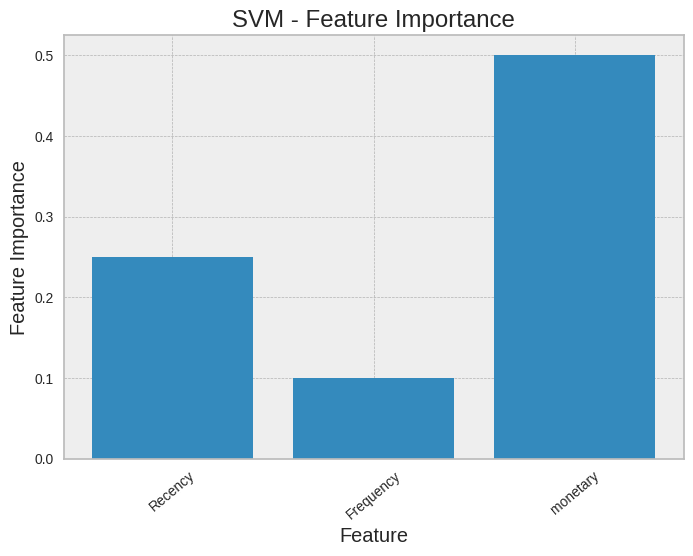

In [76]:
# Assuming df_feature_importance_svm is your DataFrame containing SVM feature importances

# Plotting feature importances for SVM
plt.bar(df_feature_importance_svm['Feature'], abs(df_feature_importance_svm['Importance']))  # Using absolute values of coefficients
plt.xlabel('Feature')
plt.ylabel('Feature Importance')
plt.title('SVM - Feature Importance')
plt.xticks(rotation=40)
plt.show()


In [77]:
features_df

,recency,frequency,monetary,total_spend_90,spend_90
CustomerID,,,,,
12346.0,326,1,77183.60,0.00,0.0
12347.0,130,5,2790.86,1519.14,1.0
12348.0,249,3,1487.24,310.00,1.0
12350.0,310,1,334.40,0.00,0.0
12352.0,262,5,1561.81,944.23,1.0
...,...,...,...,...,...
18280.0,278,1,180.60,0.00,0.0
18281.0,181,1,80.82,0.00,0.0
18282.0,126,1,100.21,77.84,1.0


In [78]:
prediction_df = pd.concat([pred_reg_df, pred_clf_df, features_df.reset_index()], axis=1)
prediction_df

,prediction_spend,prediction_prob,CustomerID,recency,frequency,monetary,total_spend_90,spend_90
0,880.680814,235.884788,12346.0,326,1,77183.60,0.00,0.0
1,1093.040219,310.452887,12347.0,130,5,2790.86,1519.14,1.0
2,627.485181,259.703887,12348.0,249,3,1487.24,310.00,1.0
3,215.185733,68.151540,12350.0,310,1,334.40,0.00,0.0
4,749.430936,259.688070,12352.0,262,5,1561.81,944.23,1.0
...,...,...,...,...,...,...,...,...
3365,135.869981,93.374941,18280.0,278,1,180.60,0.00,0.0
3366,126.482327,106.920934,18281.0,181,1,80.82,0.00,0.0
3367,126.482327,122.990555,18282.0,126,1,100.21,77.84,1.0
3368,608.504541,275.977870,18283.0,96,10,1086.83,958.70,1.0


In [79]:
# "Identify the top 10 customers with the highest probability of making repeat purchases."
prediction_df.sort_values('prediction_prob', ascending=False).head(10)

,prediction_spend,prediction_prob,CustomerID,recency,frequency,monetary,total_spend_90,spend_90
1854,1206.997433,349.066685,15547.0,110,8,2745.16,2165.44,1.0
589,1206.997433,348.757555,13327.0,113,7,2738.75,889.02,1.0
3334,1206.997433,345.582299,18225.0,113,7,2730.78,2774.18,1.0
1018,1209.481334,340.833233,14092.0,100,10,2745.42,1331.49,1.0
1071,943.861485,338.897879,14191.0,108,7,2258.26,2426.50,1.0
1038,664.493842,337.872492,14132.0,114,5,1552.46,2033.57,1.0
2444,764.160689,337.374690,16628.0,107,4,1619.84,568.21,1.0
1865,664.493842,337.208436,15572.0,110,4,1552.79,980.63,1.0
1055,1209.481334,337.120705,14159.0,96,7,2732.73,1897.62,1.0
2196,664.493842,336.911817,16170.0,113,5,1560.66,324.39,1.0


In [80]:
# 10 customers who have recently made a purchase
recent_purchase = prediction_df[(prediction_df['recency']>365) | (prediction_df['prediction_prob']<0.2)]\
                    .sort_values('recency', ascending=True)
recent_purchase.head(10)

,prediction_spend,prediction_prob,CustomerID,recency,frequency,monetary,total_spend_90,spend_90
3361,135.869981,151.992961,18269.0,366,1,168.60,0.0,0.0
1215,107.441820,131.502968,14437.0,366,1,63.00,0.0,0.0
648,341.645371,255.345859,13455.0,366,1,692.94,365.4,1.0
607,215.185733,155.463542,13369.0,366,1,308.28,0.0,0.0
558,258.222187,221.555417,13270.0,366,1,590.00,0.0,0.0
1505,215.185733,204.073366,14932.0,366,1,363.53,0.0,0.0
1531,135.869981,144.148134,14987.0,366,1,163.20,163.2,1.0
1172,135.869981,160.359784,14355.0,366,1,174.40,0.0,0.0
1674,215.185733,228.718879,15221.0,366,1,403.25,0.0,0.0
2473,135.869981,127.127331,16679.0,366,1,129.75,0.0,0.0


In [81]:
recent_purchase[recent_purchase['spend_90'] == 0].head(10)

,prediction_spend,prediction_prob,CustomerID,recency,frequency,monetary,total_spend_90,spend_90
3361,135.869981,151.992961,18269.0,366,1,168.60,0.0,0.0
1215,107.441820,131.502968,14437.0,366,1,63.00,0.0,0.0
607,215.185733,155.463542,13369.0,366,1,308.28,0.0,0.0
558,258.222187,221.555417,13270.0,366,1,590.00,0.0,0.0
1505,215.185733,204.073366,14932.0,366,1,363.53,0.0,0.0
1172,135.869981,160.359784,14355.0,366,1,174.40,0.0,0.0
1674,215.185733,228.718879,15221.0,366,1,403.25,0.0,0.0
2473,135.869981,127.127331,16679.0,366,1,129.75,0.0,0.0
1740,555.949105,226.207759,15332.0,366,4,1661.06,0.0,0.0
280,215.185733,139.439471,12797.0,366,1,254.03,0.0,0.0


In [82]:
prediction_df[prediction_df['total_spend_90'] == 0].sort_values('prediction_spend', ascending=False).head(10)

,prediction_spend,prediction_prob,CustomerID,recency,frequency,monetary,total_spend_90,spend_90
2202,4187.796022,236.173038,16180.0,100,8,10254.18,0.0,0.0
408,2615.343456,251.757335,13027.0,114,6,6912.00,0.0,0.0
1595,2111.210774,235.884788,15098.0,182,3,39916.50,0.0,0.0
2401,2098.226306,236.076720,16553.0,163,12,5719.82,0.0,0.0
379,1725.433881,236.552190,12980.0,158,9,7374.90,0.0,0.0
1964,1724.622007,235.884788,15749.0,235,3,44534.30,0.0,0.0
213,1610.360070,253.511005,12688.0,114,1,4873.81,0.0,0.0
849,1544.507045,248.568907,13802.0,139,3,4599.42,0.0,0.0
1553,1510.558711,235.884920,15032.0,256,3,4959.10,0.0,0.0
1870,1492.329465,270.304139,15581.0,121,13,3675.77,0.0,0.0


In [83]:
from datetime import datetime
import pandas as pd
import numpy as np
import plotly.figure_factory as ff
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
import missingno as msno
from matplotlib import rcParams
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from yellowbrick.cluster import KElbowVisualizer
from sklearn.mixture import GaussianMixture
from sklearn.cluster import KMeans

In [84]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Revenue
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6.0,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6.0,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8.0,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6.0,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6.0,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34


Calculating Monetary Value (Revenue)

In [85]:
# Total Amount:
df['Revenue']= df['Quantity']*df['UnitPrice']
tm=df.groupby('CustomerID')['Revenue'].sum().reset_index()
tm

,CustomerID,Revenue
0,12346.0,77183.60
1,12347.0,4310.00
2,12348.0,1797.24
3,12349.0,1757.55
4,12350.0,334.40
...,...,...
4333,18280.0,180.60
4334,18281.0,80.82
4335,18282.0,178.05
4336,18283.0,2045.53


Calculating Frequency (InvoiceNo)

In [86]:
#number_transaction:
nt=df.groupby('CustomerID')['InvoiceNo'].count().reset_index()
nt

,CustomerID,InvoiceNo
0,12346.0,1
1,12347.0,182
2,12348.0,31
3,12349.0,73
4,12350.0,17
...,...,...
4333,18280.0,10
4334,18281.0,7
4335,18282.0,12
4336,18283.0,721


Calculating Recency (Last Transaction)

In [87]:
#Last transaction:
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])
df['Last_transaction']=(df['InvoiceDate'].max()-df['InvoiceDate']).dt.days
lt = df.groupby(['CustomerID','Country'])['Last_transaction'].max().reset_index()
lt

,CustomerID,Country,Last_transaction
0,12346.0,United Kingdom,325
1,12347.0,Iceland,366
2,12348.0,Finland,357
3,12349.0,Italy,18
4,12350.0,Norway,309
...,...,...,...
4341,18280.0,United Kingdom,277
4342,18281.0,United Kingdom,180
4343,18282.0,United Kingdom,125
4344,18283.0,United Kingdom,336


In [88]:
merge1= pd.merge(lt, nt, how='inner', on='CustomerID')
new_df=pd.merge(merge1,tm,how='inner',on= 'CustomerID')
new_df

,CustomerID,Country,Last_transaction,InvoiceNo,Revenue
0,12346.0,United Kingdom,325,1,77183.60
1,12347.0,Iceland,366,182,4310.00
2,12348.0,Finland,357,31,1797.24
3,12349.0,Italy,18,73,1757.55
4,12350.0,Norway,309,17,334.40
...,...,...,...,...,...
4341,18280.0,United Kingdom,277,10,180.60
4342,18281.0,United Kingdom,180,7,80.82
4343,18282.0,United Kingdom,125,12,178.05
4344,18283.0,United Kingdom,336,721,2045.53


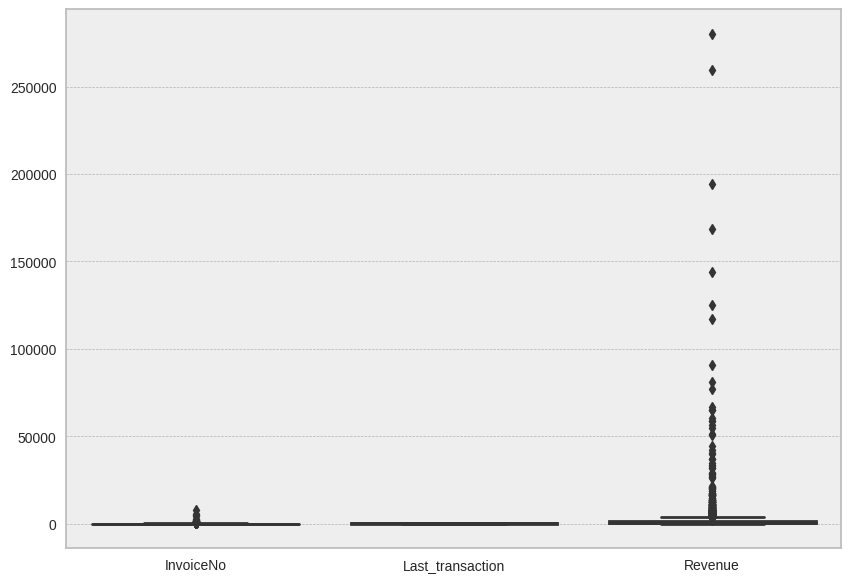

In [89]:
plt.figure(figsize=(10,7))
sns.boxplot(data = new_df[['InvoiceNo','Last_transaction','Revenue']])
plt.show()

In [90]:
IQR= new_df['Revenue'].quantile(0.75)-new_df['Revenue'].quantile(0.25)
lower_limit= new_df['Revenue'].quantile(0.25) - 1.5*IQR
upper_limit=new_df['Revenue'].quantile(0.75) + 1.5*IQR
k=new_df[new_df['Revenue']>upper_limit]
m=new_df[new_df['Revenue']<lower_limit]
df_iqr=new_df[(new_df['Revenue']<upper_limit) & (new_df['Revenue']>lower_limit)]
print('Data shape before removing outlier',new_df.shape)
print('Data shape after removing outlier',df_iqr.shape)
print('Total number of outlier:',len(k)+len(m))

Data shape before removing outlier (4346, 5)
Data shape after removing outlier (3920, 5)
Total number of outlier: 426


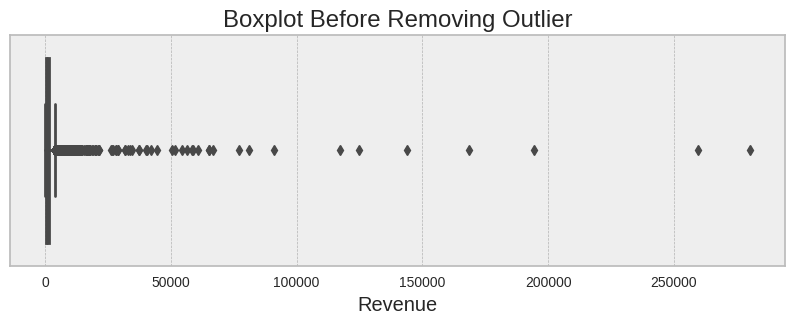

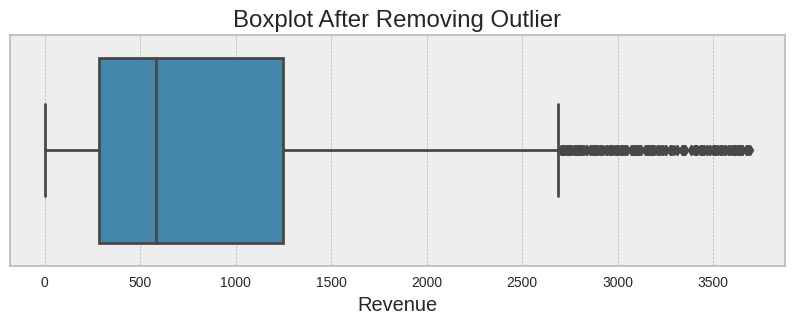

In [91]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot boxplot before removing outliers
plt.figure(figsize=(10, 3))
sns.boxplot(data=new_df, x='Revenue')
plt.title('Boxplot Before Removing Outlier')
plt.show()

# Plot boxplot after removing outliers
plt.figure(figsize=(10, 3))
sns.boxplot(data=df_iqr, x='Revenue')
plt.title('Boxplot After Removing Outlier')
plt.show()



In [92]:
### The new data frame after removing outlier
df_iqr.reset_index(drop=True, inplace= True)
df_iqr

,CustomerID,Country,Last_transaction,InvoiceNo,Revenue
0,12348.0,Finland,357,31,1797.24
1,12349.0,Italy,18,73,1757.55
2,12350.0,Norway,309,17,334.40
3,12352.0,Norway,296,85,2506.04
4,12353.0,Bahrain,203,4,89.00
...,...,...,...,...,...
3915,18280.0,United Kingdom,277,10,180.60
3916,18281.0,United Kingdom,180,7,80.82
3917,18282.0,United Kingdom,125,12,178.05
3918,18283.0,United Kingdom,336,721,2045.53


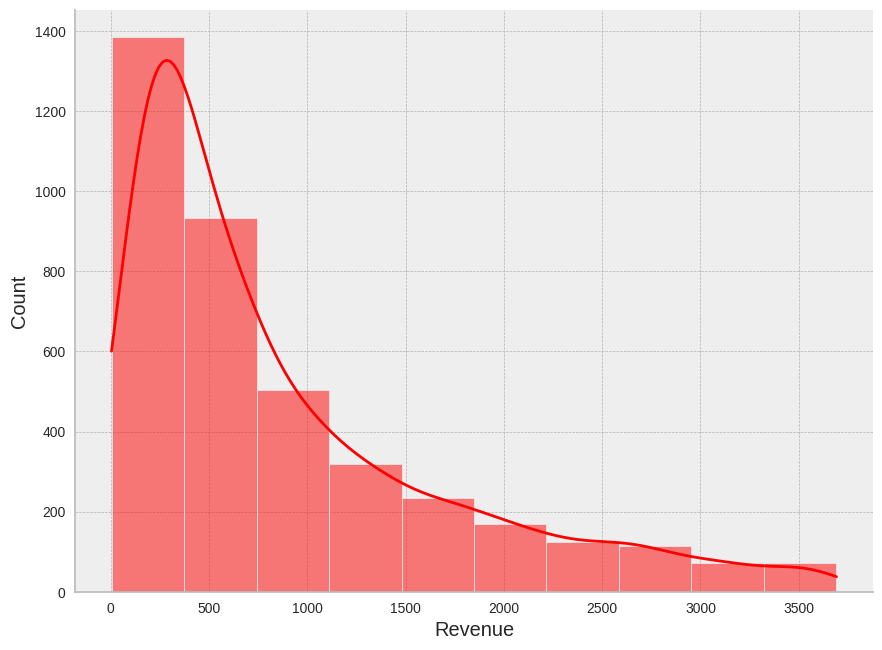

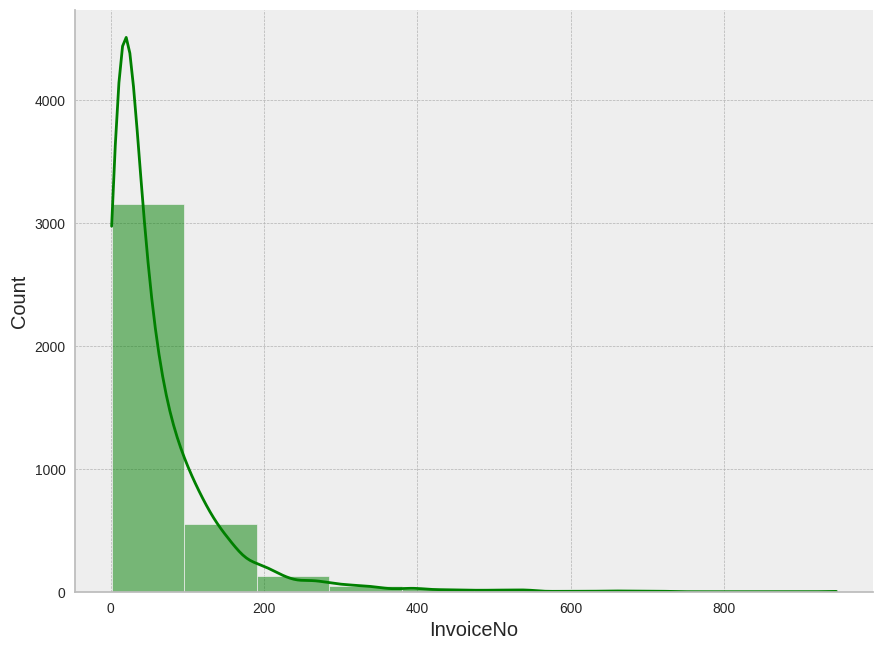

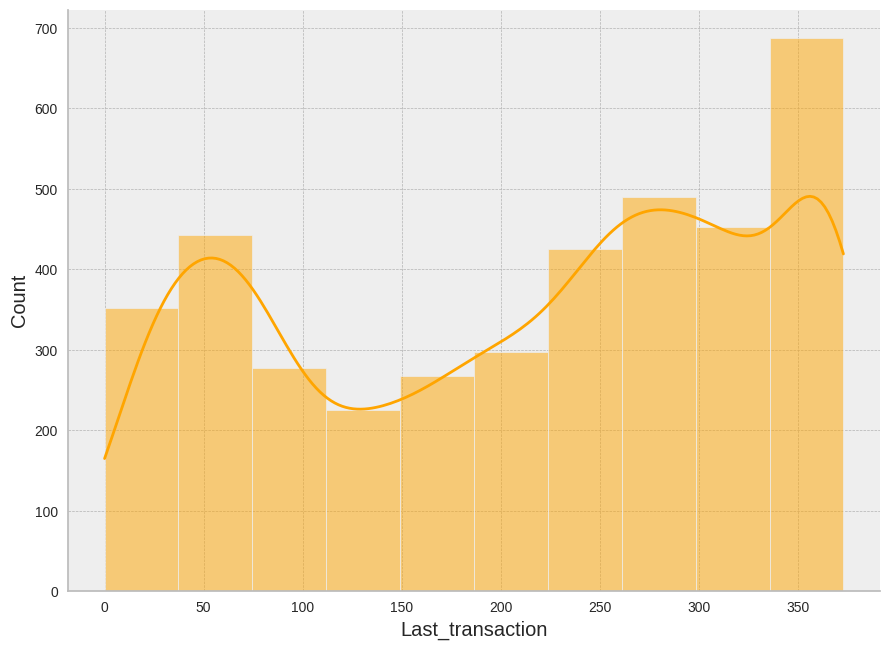

In [93]:
import seaborn as sns
import matplotlib.pyplot as plt

new1_df = df_iqr.copy()
df_num = ['Revenue', 'InvoiceNo', 'Last_transaction']
colors = ['red', 'green', 'orange']

for i, col in enumerate(df_num):
    sns.displot(new1_df[col], bins=10, kde=True, color=colors[i])
    plt.gcf().set_size_inches(10, 7)
    plt.show()


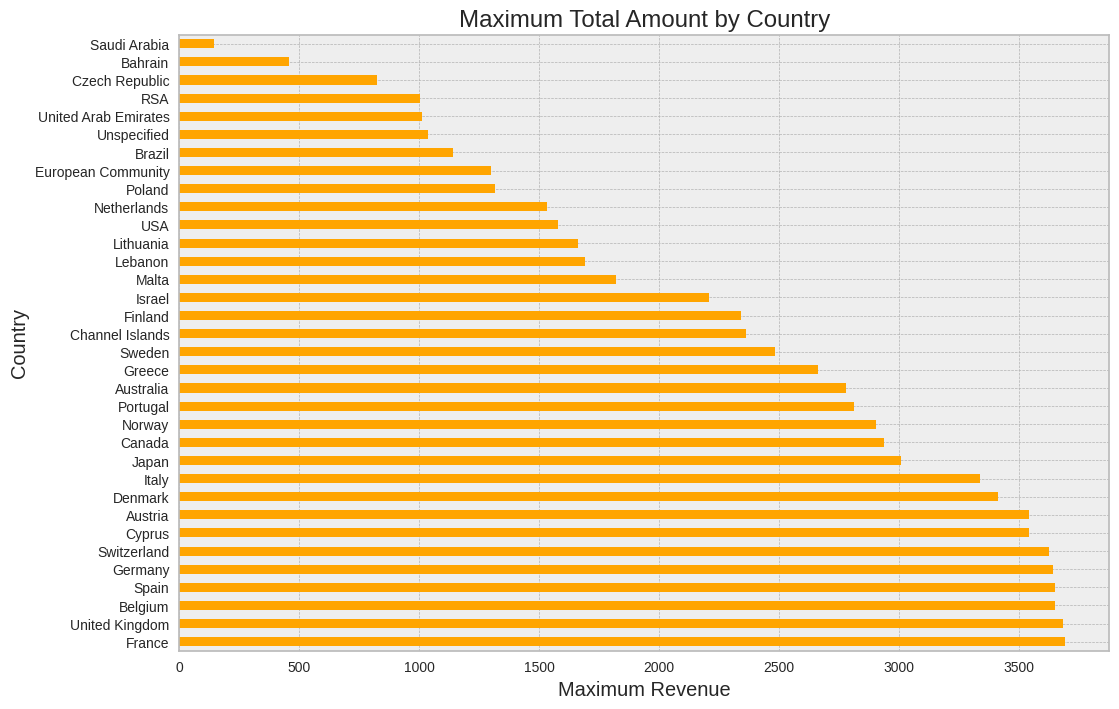

In [94]:
plt.figure(figsize=(12, 8))
new1_df.groupby("Country").Revenue.max().sort_values(ascending=False).plot.barh(color='orange')
plt.xlabel('Maximum Revenue')
plt.ylabel('Country')
plt.title('Maximum Total Amount by Country')
plt.show()


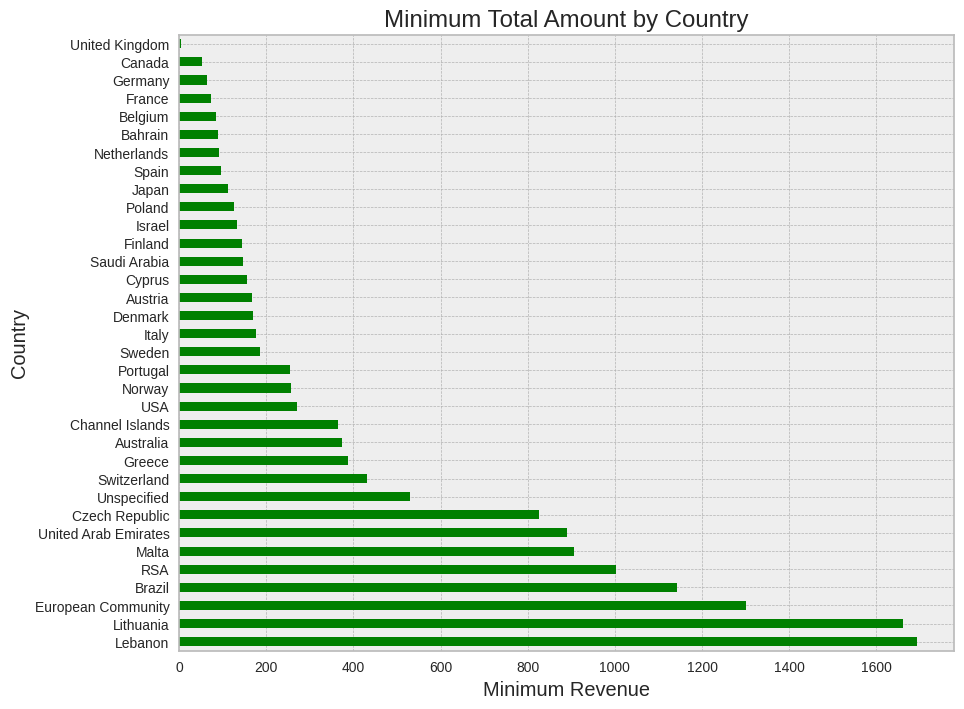

In [95]:
plt.figure(figsize=(10, 8))
new1_df.groupby("Country").Revenue.min().sort_values(ascending=False).plot.barh(color='green')
plt.xlabel('Minimum Revenue')
plt.ylabel('Country')
plt.title('Minimum Total Amount by Country')
plt.show()


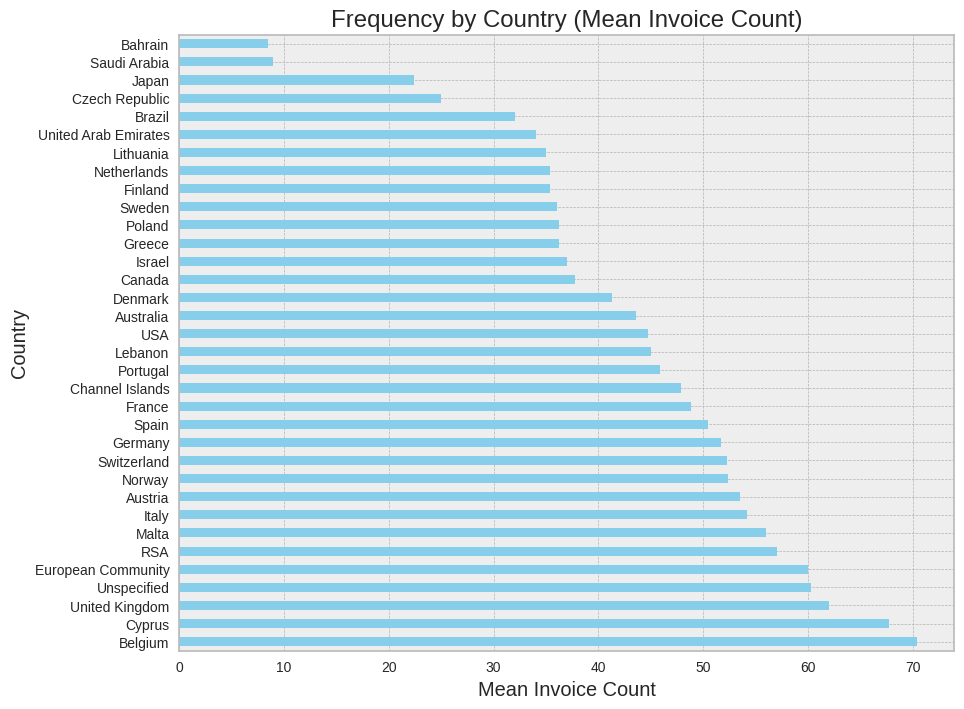

In [96]:
plt.figure(figsize=(10, 8))
new1_df.groupby("Country").InvoiceNo.mean().sort_values(ascending=False).plot.barh(color='skyblue')
plt.xlabel('Mean Invoice Count')
plt.ylabel('Country')
plt.title('Frequency by Country (Mean Invoice Count)')
plt.show()


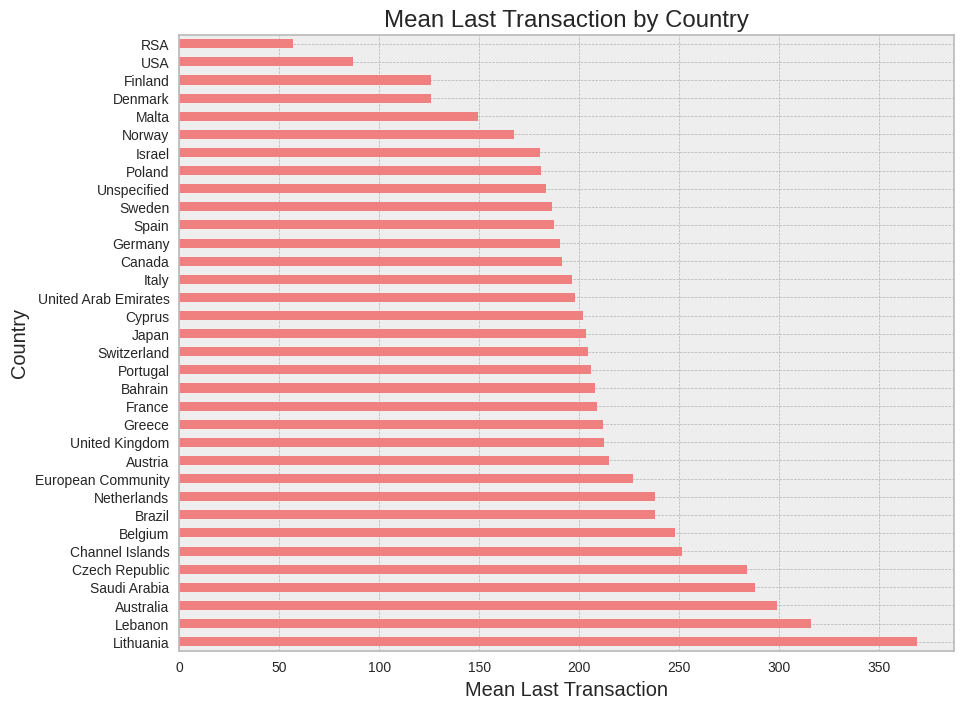

In [97]:
plt.figure(figsize=(10, 8))
new1_df.groupby("Country").Last_transaction.mean().sort_values(ascending=False).plot.barh(color='lightcoral')
plt.xlabel('Mean Last Transaction')
plt.ylabel('Country')
plt.title('Mean Last Transaction by Country')
plt.show()


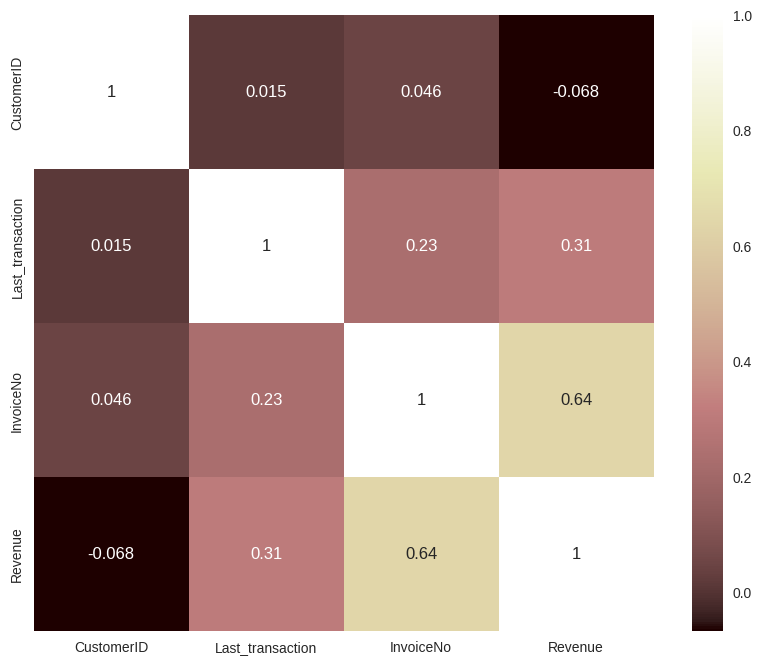

In [98]:
plt.figure(figsize=(10,8))
sns.heatmap(new1_df.corr(),cmap="pink", annot=True)
plt.show()

<Figure size 1400x800 with 0 Axes>

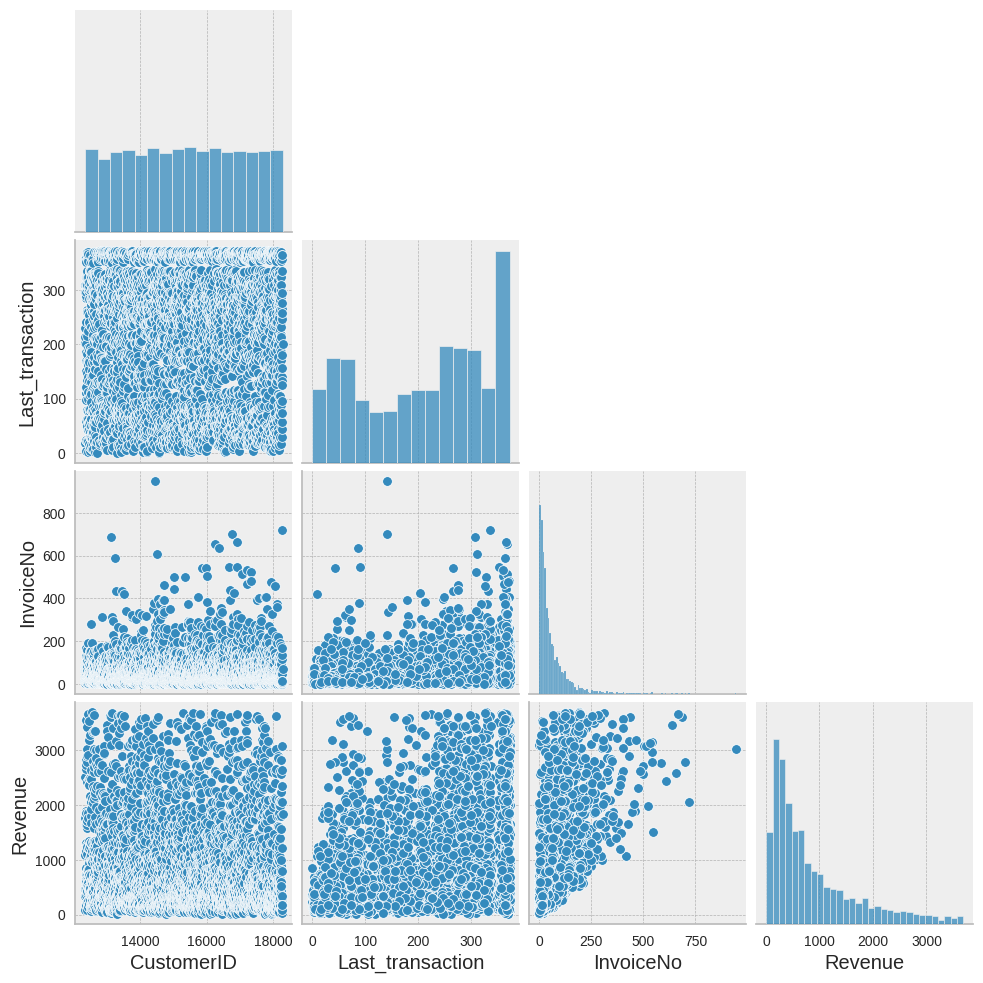

In [99]:
import seaborn as sns
import matplotlib.pyplot as plt

# Custom color palette
custom_palette = ["#6A5ACD"]

plt.figure(figsize=(14, 8))
sns.pairplot(new1_df, corner=True, palette=custom_palette)
plt.show()


In [100]:
new2_df=new1_df[['Last_transaction','InvoiceNo','Revenue']]
scaler = MinMaxScaler()
scaled_df = scaler.fit_transform(new2_df)
scaled_df = pd.DataFrame(scaled_df)
scaled_df.columns=['Last_transaction','InvoiceNo','Revenue']
scaled_df['Country']=new1_df['Country']
scaled_df

,Last_transaction,InvoiceNo,Revenue,Country
0,0.957105,0.031712,0.486234,Finland
1,0.048257,0.076110,0.475474,Italy
2,0.828418,0.016913,0.089643,Norway
3,0.793566,0.088795,0.678398,Norway
4,0.544236,0.003171,0.023112,Bahrain
...,...,...,...,...
3915,0.742627,0.009514,0.047946,United Kingdom
3916,0.482574,0.006342,0.020895,United Kingdom
3917,0.335121,0.011628,0.047255,United Kingdom
3918,0.900804,0.761099,0.553548,United Kingdom


 K-means Clusters: Elbow Method

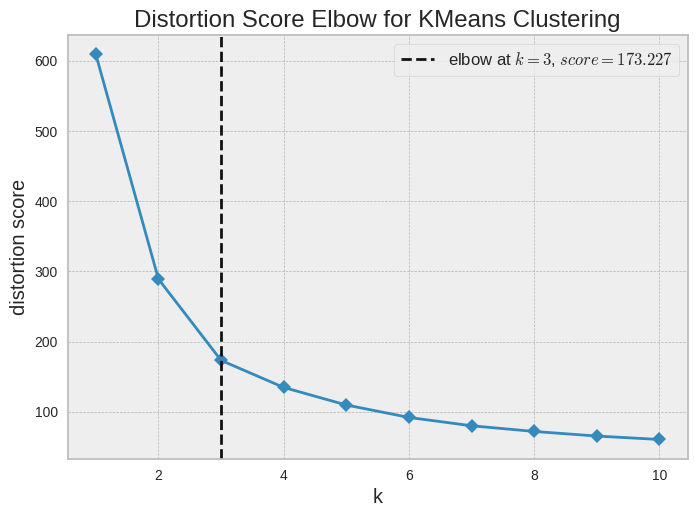

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [101]:
df_k=scaled_df.drop(columns=['Country'],axis=1)
# Elbow Method for K means
# Import ElbowVisualizer
from yellowbrick.cluster import KElbowVisualizer
model = KMeans()
# k is range of number of clusters.
visualizer = KElbowVisualizer(model, k=(1,11), timings= False)
visualizer.fit(df_k)        # Fit data to visualizer
visualizer.show()        # Finalize and render figure

In [102]:
df_k=scaled_df.drop(columns=['Country'],axis=1)
df_k

,Last_transaction,InvoiceNo,Revenue
0,0.957105,0.031712,0.486234
1,0.048257,0.076110,0.475474
2,0.828418,0.016913,0.089643
3,0.793566,0.088795,0.678398
4,0.544236,0.003171,0.023112
...,...,...,...
3915,0.742627,0.009514,0.047946
3916,0.482574,0.006342,0.020895
3917,0.335121,0.011628,0.047255
3918,0.900804,0.761099,0.553548


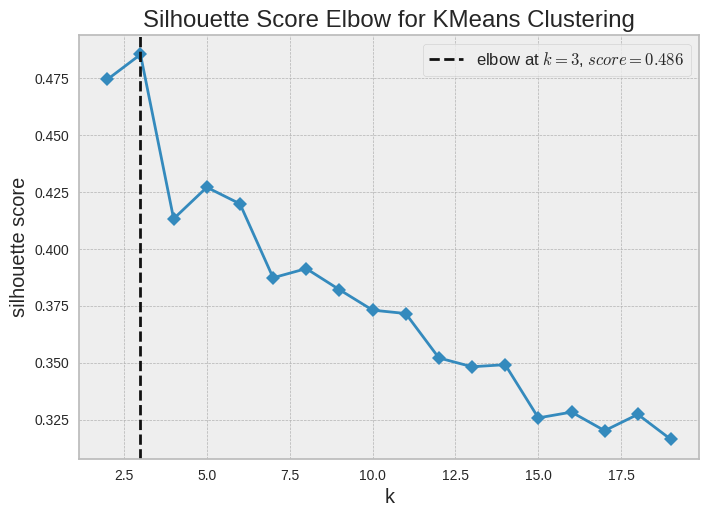

<Axes: title={'center': 'Silhouette Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='silhouette score'>

In [103]:
# Silhouette Score for K means
# Import ElbowVisualizer
from yellowbrick.cluster import KElbowVisualizer
model = KMeans()
# k is range of number of clusters.
visualizer = KElbowVisualizer(model, k=(2,20),metric='silhouette', timings= False)
visualizer.fit(df_k)        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure

In [104]:
# Add the number of cluster columns in the data frame
km = KMeans(n_clusters=3)
y_predicted = km.fit_predict(df_k)
df_k['clusters']= y_predicted
df_k

,Last_transaction,InvoiceNo,Revenue,clusters
0,0.957105,0.031712,0.486234,2
1,0.048257,0.076110,0.475474,0
2,0.828418,0.016913,0.089643,1
3,0.793566,0.088795,0.678398,2
4,0.544236,0.003171,0.023112,1
...,...,...,...,...
3915,0.742627,0.009514,0.047946,1
3916,0.482574,0.006342,0.020895,0
3917,0.335121,0.011628,0.047255,0
3918,0.900804,0.761099,0.553548,2


In [105]:
# Cluster centroid:
km.cluster_centers_

array([[0.22089231, 0.04018667, 0.14764882],
       [0.77649026, 0.04310651, 0.15679324],
       [0.7983226 , 0.16061093, 0.63310181]])

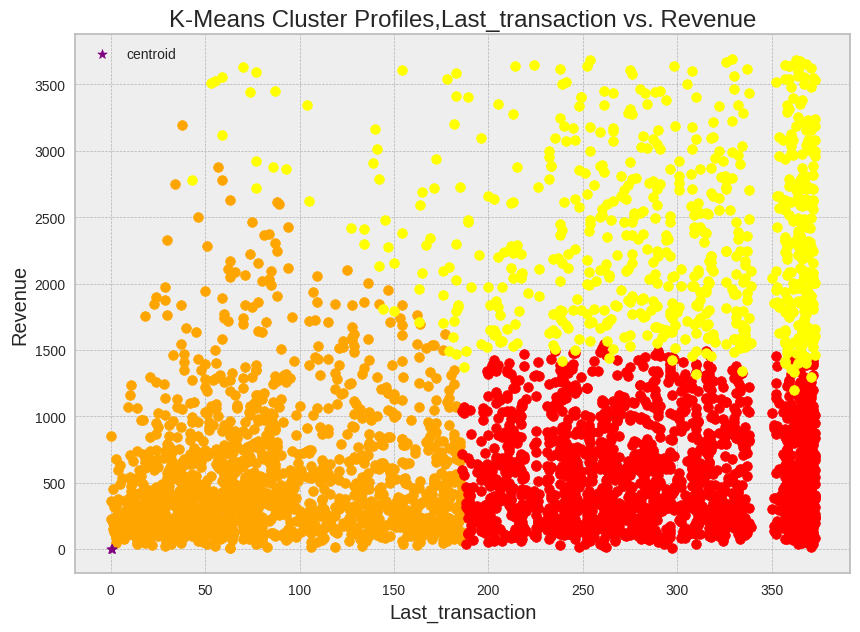

In [106]:
# Visualize the clusters with original data
new2_df['clusters']= y_predicted
df1 = new2_df[new2_df.clusters==0]
df2 = new2_df[new2_df.clusters==1]
df3 = new2_df[new2_df.clusters==2]
plt.figure(figsize=(10,7))
plt.scatter(df1.Last_transaction,df1['Revenue'],color='orange')
plt.scatter(df2.Last_transaction,df2['Revenue'],color='red')
plt.scatter(df3.Last_transaction,df3['Revenue'],color='yellow')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='purple',marker='*',label='centroid')
plt.legend()
plt.xlabel('Last_transaction')
plt.ylabel('Revenue')
plt.title('K-Means Cluster Profiles,Last_transaction vs. Revenue')
plt.show()

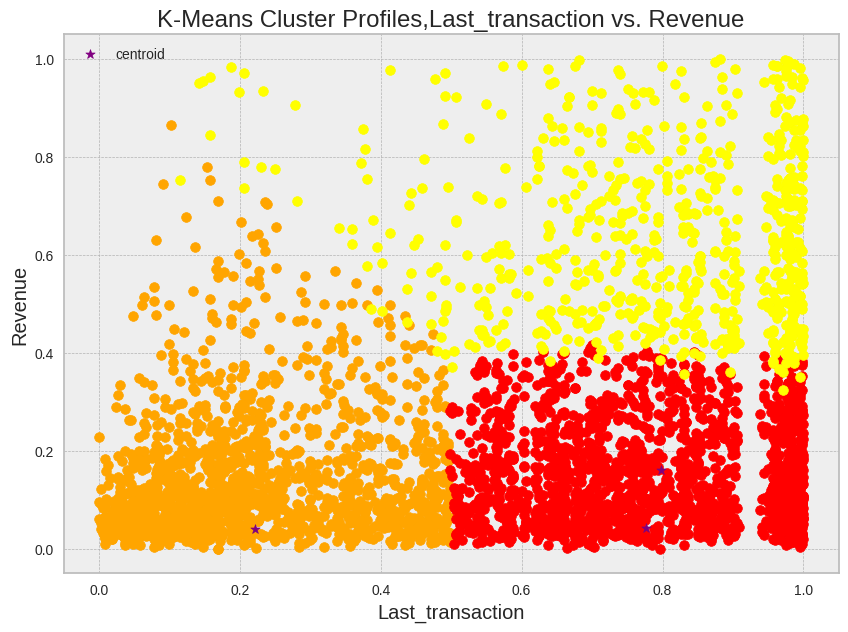

In [107]:
# Visualize the clusters with scaled data:
df1 = df_k[df_k.clusters==0]
df2 = df_k[df_k.clusters==1]
df3 = df_k[df_k.clusters==2]
plt.figure(figsize=(10,7))
plt.scatter(df1.Last_transaction,df1['Revenue'],color='orange')
plt.scatter(df2.Last_transaction,df2['Revenue'],color='red')
plt.scatter(df3.Last_transaction,df3['Revenue'],color='yellow')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='purple',marker='*',label='centroid')
plt.legend()
plt.xlabel('Last_transaction')
plt.ylabel('Revenue')
plt.title('K-Means Cluster Profiles,Last_transaction vs. Revenue')
plt.show()

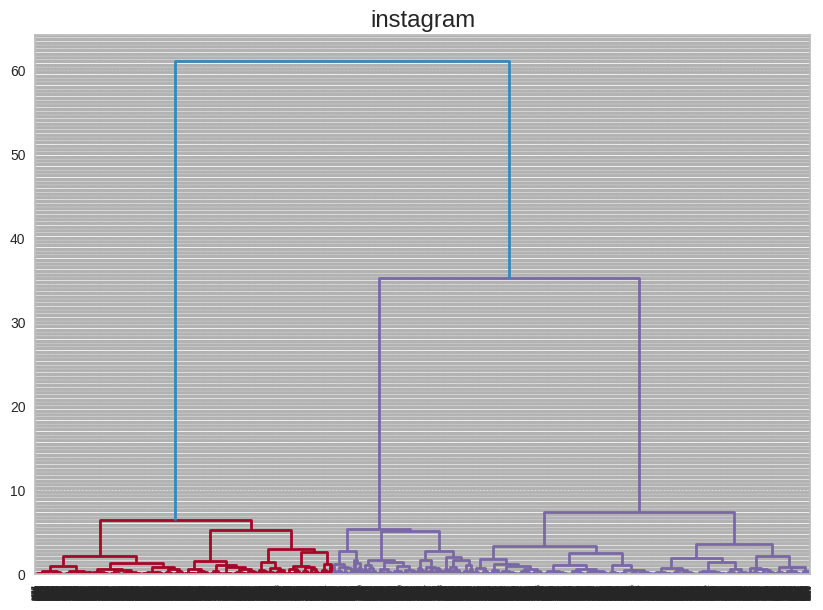

In [108]:
import scipy.cluster.hierarchy as shc
plt.figure(figsize=(10, 7))
plt.title("instagram")
dend = shc.dendrogram(shc.linkage(df_k, method='ward'))

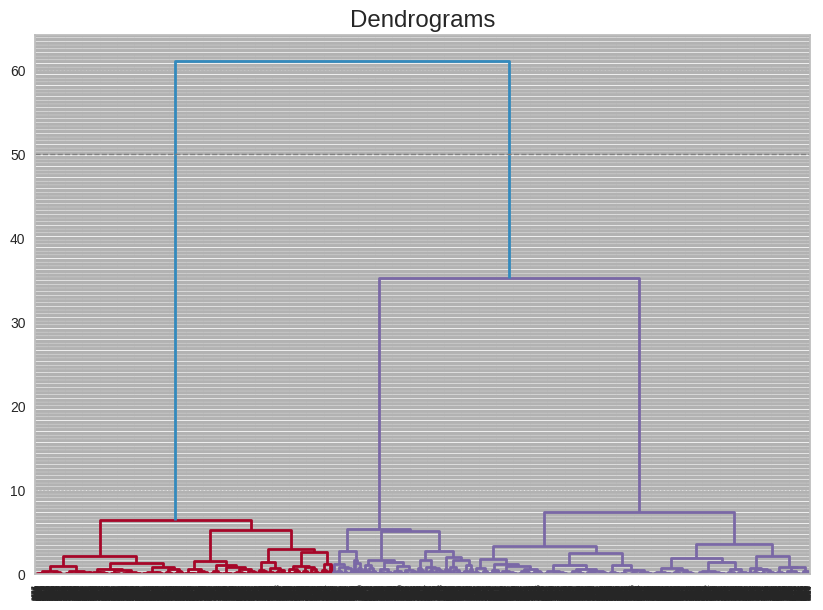

In [109]:
plt.figure(figsize=(10, 7))
plt.title("Dendrograms")
dend = shc.dendrogram(shc.linkage(df_k, method='ward'))
plt.axhline(y=50, c='grey', lw=1, linestyle='dashed')
plt.show()

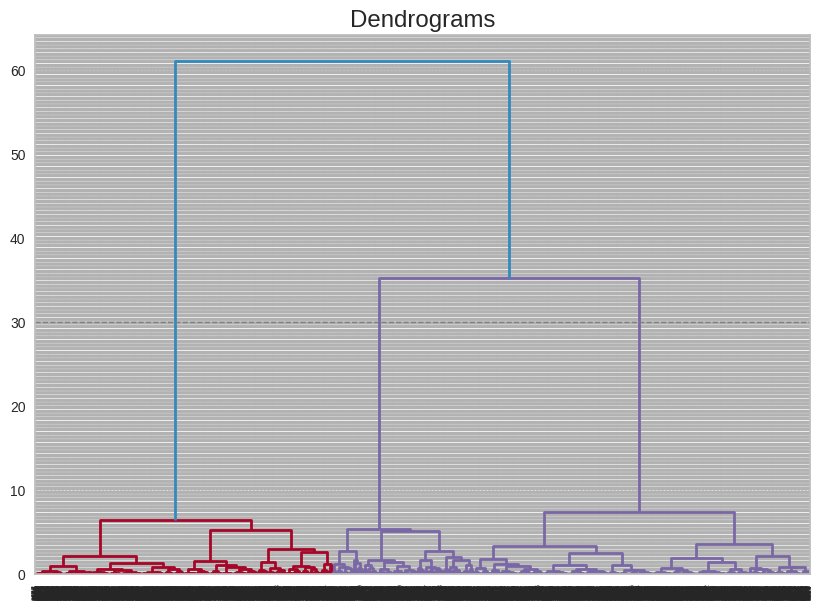

In [110]:
plt.figure(figsize=(10, 7))
plt.title("Dendrograms")
dend = shc.dendrogram(shc.linkage(df_k, method='ward'))
plt.axhline(y=30, c='grey', lw=1, linestyle='dashed')
plt.show()

In [111]:
from sklearn.cluster import AgglomerativeClustering
cluster_new = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward')
two_clusters=cluster_new.fit_predict(df_k)

cluster_new = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')
three_clusters=cluster_new.fit_predict(df_k)

df_k['two_clusters'] = two_clusters
df_k['three_clusters']= three_clusters
df_k

,Last_transaction,InvoiceNo,Revenue,clusters,two_clusters,three_clusters
0,0.957105,0.031712,0.486234,2,0,2
1,0.048257,0.076110,0.475474,0,1,1
2,0.828418,0.016913,0.089643,1,0,0
3,0.793566,0.088795,0.678398,2,0,2
4,0.544236,0.003171,0.023112,1,0,0
...,...,...,...,...,...,...
3915,0.742627,0.009514,0.047946,1,0,0
3916,0.482574,0.006342,0.020895,0,1,1
3917,0.335121,0.011628,0.047255,0,1,1
3918,0.900804,0.761099,0.553548,2,0,2


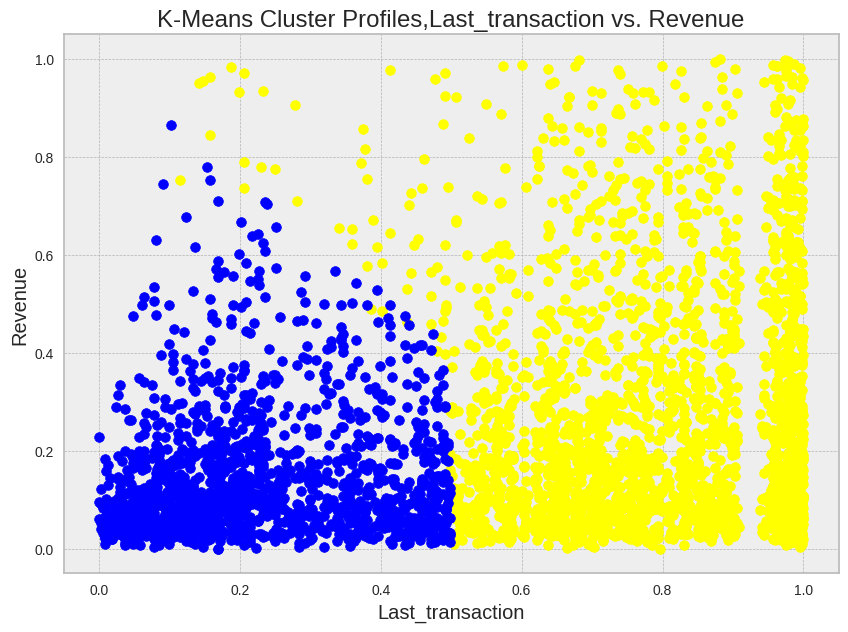

In [112]:
# Visualize the clusters with scaled data:
df1 = df_k[df_k.two_clusters==0]
df2 = df_k[df_k.two_clusters==1]
plt.figure(figsize=(10,7))
plt.scatter(df1.Last_transaction,df1['Revenue'],color='yellow')
plt.scatter(df2.Last_transaction,df2['Revenue'],color='blue')
plt.legend()
plt.xlabel('Last_transaction')
plt.ylabel('Revenue')
plt.title('K-Means Cluster Profiles,Last_transaction vs. Revenue')
plt.show()

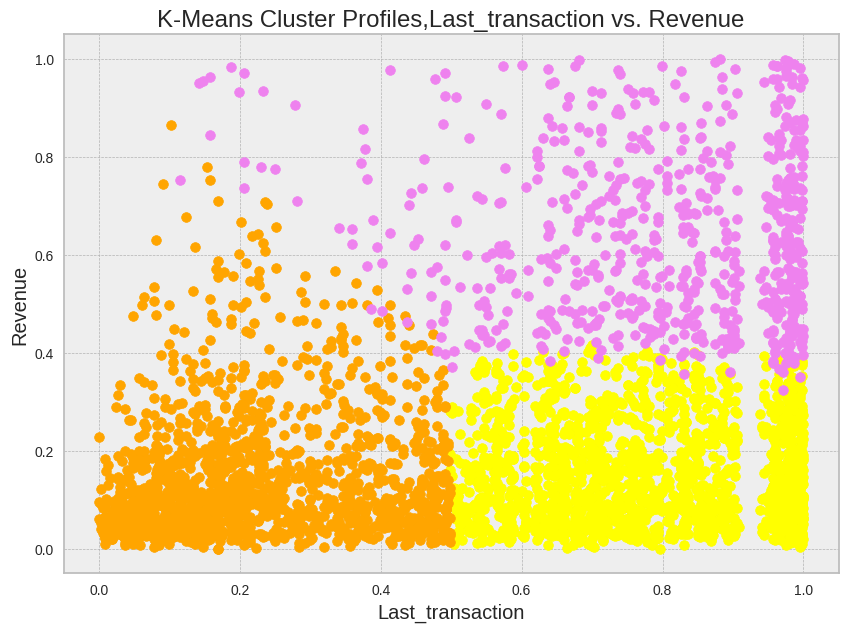

In [113]:
# Visualize the clusters with scaled data:
df1 = df_k[df_k.three_clusters==0]
df2 = df_k[df_k.three_clusters==1]
df3 = df_k[df_k.three_clusters==2]
plt.figure(figsize=(10,7))
plt.scatter(df1.Last_transaction,df1['Revenue'],color='yellow')
plt.scatter(df2.Last_transaction,df2['Revenue'],color='orange')
plt.scatter(df3.Last_transaction,df3['Revenue'],color='violet')
plt.xlabel('Last_transaction')
plt.ylabel('Revenue')
plt.title('K-Means Cluster Profiles,Last_transaction vs. Revenue')
plt.show()

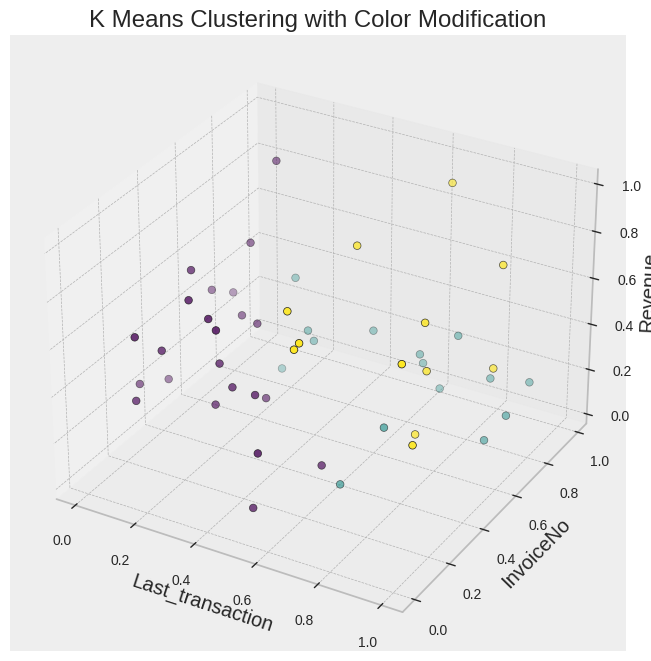

In [114]:
from sklearn.cluster import KMeans
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Example data (replace this with your actual data)
data = {
    'Last_transaction': np.random.rand(50),
    'InvoiceNo': np.random.rand(50),
    'Revenue': np.random.rand(50)
}

df_k = pd.DataFrame(data)

# KMeans Clustering with 3 clusters
km = KMeans(n_clusters=3)
km.fit(df_k)
labels = km.labels_

# Plotting with different colors for clusters
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df_k['Last_transaction'], df_k['InvoiceNo'], df_k['Revenue'], c=labels, cmap='viridis', edgecolor="k", s=30)
ax.set_xlabel("Last_transaction")
ax.set_ylabel("InvoiceNo")
ax.set_zlabel("Revenue")
ax.set_title("K Means Clustering with Color Modification")
plt.show()


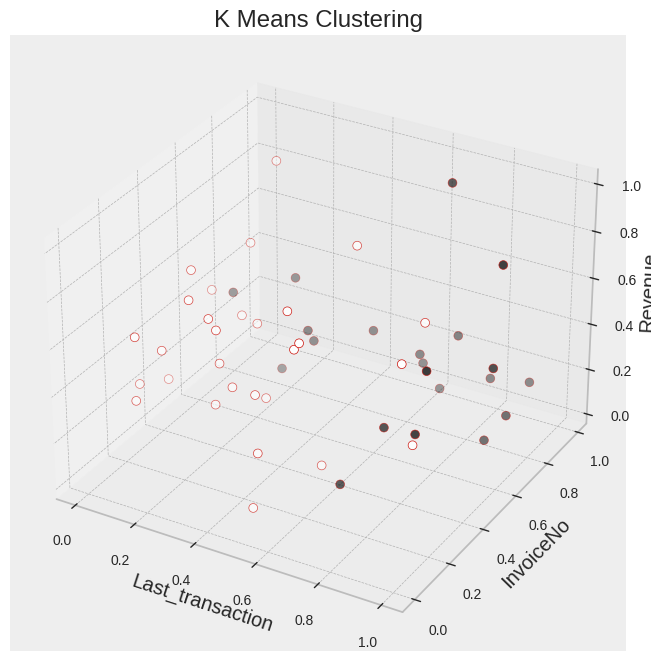

In [115]:
# KMeans Clustering with 2 clusters
km = KMeans(n_clusters=2)
km.fit(df_k)
labels = km.labels_

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df_k['Last_transaction'], df_k['InvoiceNo'], df_k['Revenue'], c=labels.astype(np.float), edgecolor="r", s=40)
ax.set_xlabel("Last_transaction")
ax.set_ylabel("InvoiceNo")
ax.set_zlabel("Revenue")
ax.set_title("K Means Clustering")
plt.show()



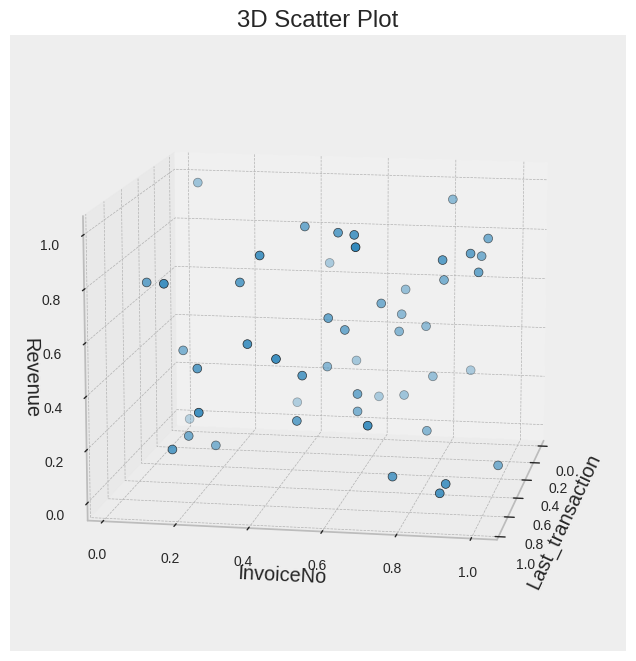

In [116]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import pandas as pd
import numpy as np

# Example data (replace this with your actual data)
data = {
    'Last_transaction': np.random.rand(50),
    'InvoiceNo': np.random.rand(50),
    'Revenue': np.random.rand(50)
}

df_k = pd.DataFrame(data)

# Plotting 3D Scatter Plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df_k['Last_transaction'], df_k['InvoiceNo'], df_k['Revenue'], edgecolor="k", s=40)
ax.set_xlabel("Last_transaction")
ax.set_ylabel("InvoiceNo")
ax.set_zlabel("Revenue")
ax.set_title("3D Scatter Plot")
ax.view_init(elev=12, azim=10)

plt.show()
